#### IMDB SENTIMENT ANALYSIS

Sentiment Analysis can be carried out by text preprocessing using the standard NLP procedures and applying Language Understanding Algorithms to predict user sentiments.

**Problem Statement:**

In this, we have to predict the number of positive and negative reviews based on sentiments by using  classification model.

**About the dataset**
* The Data has been collected from the internet movie database(IMDB)
* The dataset consists of 100K Reviews out of which 50K reviews are unsupported i,e they are not labelled as neither positive nor negative
* Remaining 50k reviews has been labelled as positive or negative

**Steps Involved**
Creating the movie review corpus by performing necessary text preprocessing steps
* *Lowering the text*
* *Removing URL's*
* *Removing punctuations,Stopwords, and Extraspaces*
* *Applying lemmatization*
* *Using TF-IDF Vectorizer to create Word Embeddings*
* *model building*


In [27]:
#importing necessary packages import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
nltk.download('punkt')

#for handling stopwords
from nltk.corpus import stopwords

sw = set(stopwords.words('english'))
# for word lemmatization
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

[nltk_data] Downloading package punkt to C:\Users\prajwal
[nltk_data]     ramesh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [28]:
#importing the dataset
data = pd.read_csv('imdb_master.csv',encoding="ISO-8859-1")
data.head()

,Unnamed: 0,type,review,label,file
0,0,test,Once again Mr. Costner has dragged out a movie...,neg,0_2.txt
1,1,test,This is an example of why the majority of acti...,neg,10000_4.txt
2,2,test,"First of all I hate those moronic rappers, who...",neg,10001_1.txt
3,3,test,Not even the Beatles could write songs everyon...,neg,10002_3.txt
4,4,test,Brass pictures (movies is not a fitting word f...,neg,10003_3.txt


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  100000 non-null  int64 
 1   type        100000 non-null  object
 2   review      100000 non-null  object
 3   label       100000 non-null  object
 4   file        100000 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [30]:
#dropping the columns which are not required for our model building
drop_cols = ['Unnamed: 0','file','type']
data.drop(drop_cols,axis=1,inplace=True)

In [31]:
data.head()

,review,label
0,Once again Mr. Costner has dragged out a movie...,neg
1,This is an example of why the majority of acti...,neg
2,"First of all I hate those moronic rappers, who...",neg
3,Not even the Beatles could write songs everyon...,neg
4,Brass pictures (movies is not a fitting word f...,neg


In [32]:
data['label'].value_counts()

unsup    50000
neg      25000
pos      25000
Name: label, dtype: int64

* Removing the reviews whose sentiment are unsupported that is they not labelled as either positive or negative

In [33]:
filtereddata = data[data['label']!='unsup']
filtereddata

,review,label
0,Once again Mr. Costner has dragged out a movie...,neg
1,This is an example of why the majority of acti...,neg
2,"First of all I hate those moronic rappers, who...",neg
3,Not even the Beatles could write songs everyon...,neg
4,Brass pictures (movies is not a fitting word f...,neg
...,...,...
49995,"Seeing as the vote average was pretty low, and...",pos
49996,"The plot had some wretched, unbelievable twist...",pos
49997,I am amazed at how this movie(and most others ...,pos
49998,A Christmas Together actually came before my t...,pos


In [34]:
filtereddata['label'].value_counts()

neg    25000
pos    25000
Name: label, dtype: int64

* we now have data for 25k positive and 25k negative reviews

#### Text preprocessing and vectorization using TF-IDF Vectorizer

In [35]:
#cleaning and preprocessing the the text data
def preprocesstext(data):
    #converting all the words into lowercase
    data = data.lower()
    #removing html tags
    data = re.sub('<.*?>',"",data)
    #to remove any punctuations
    data = re.sub('\W+'," ",data)
    #removing numericals from the text data (such as '1947','19th' century)
    data = re.sub('\d+[a-z]*',"",data)
    #removing any extraspaces from the data
    data = re.sub('  +'," ",data)
    # tokenizing the textdata
    data = nltk.word_tokenize(data)
    # removing the stopwords
    data = [word for word in data if word not in sw]
    # lemmatizing the words
    data = [lemmatizer.lemmatize(word) for word in data]
    # removing words which have length less than 2
    data = [word for word in data if len(word)>2]
    corpus.append(' '.join(data))
    return data

In [36]:
corpus=[]
for i in range(len(filtereddata)):
    preprocesstext(filtereddata['review'].iloc[i])

In [38]:
len(corpus)

50000

* now the data is ready after removing punctuations , stopwords and lemmatized
* now we will use the tf-idf vectorizer

In [39]:
#applying TF-IDF
vec=TfidfVectorizer()
vec.fit(corpus)
X = vec.transform(corpus)

In [42]:
#mapping negative values as 0 and positive values as 1
labelmap = {'neg':0,'pos':1}
y = filtereddata['label'].map(labelmap)

In [43]:
y

0        0
1        0
2        0
3        0
4        0
        ..
49995    1
49996    1
49997    1
49998    1
49999    1
Name: label, Length: 50000, dtype: int64

In [44]:
#creating test and train split
x_train , x_test , y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=123,shuffle=True)

In [45]:
x_train

<45000x93009 sparse matrix of type '<class 'numpy.float64'>'
	with 4206001 stored elements in Compressed Sparse Row format>

#### Creating a MULTINOMINAL NAIVE BAYES CLASSIFIER MODEL

In [46]:
model= MultinomialNB(alpha=3)
model.fit(x_train,y_train)

MultinomialNB(alpha=3)

In [47]:
#predicting for test data
y_pred = model.predict(x_test)

In [48]:
print('Test accuracy',accuracy_score(y_test,y_pred))

Test accuracy 0.8704


In [49]:
#classification report for negative and positive reviews
print(classification_report(y_test,y_pred,target_names=['negative review','positive review']))

                 precision    recall  f1-score   support

negative review       0.85      0.89      0.87      2484
positive review       0.89      0.85      0.87      2516

       accuracy                           0.87      5000
      macro avg       0.87      0.87      0.87      5000
   weighted avg       0.87      0.87      0.87      5000



Text(0.5, 1.0, 'Confusion Matrix')

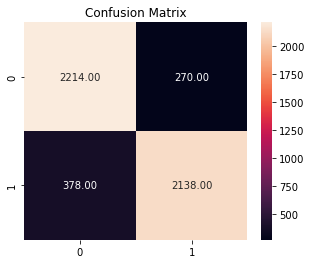

In [50]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.2f')
plt.title('Confusion Matrix')

* We have obtained a accuracy of 87.04% which is impressive
* The model is predicting well for both the classes with good precision and recall scores